# Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") traz um dataset simples e clássico para treino de redes neurais. O dataset é uma série de imagens de núemros escritos a mão e vem sendo utilizado por muitos estudantes para treinar técnicas de visão computacional.

O [Kaggle](https://www.kaggle.com) traz o desafio de prever quais números estão escritos em cada imagem, para mais informações clique [aqui](https://www.kaggle.com/c/digit-recognizer).

Apesar de ser um dataset com grandes possibilidades, quando eu o resolvi estava aprendendo, então a resolção é simples usando apenas deep learning, sem usar técnicas de redes convolucionais. 

Meus objetivos nesse notebook são:


- Preparar os dados para o modelo de rede neural;
- Treinar o modelo de deep learning para a predição;
- Validação;

## Importando bibliotecas

In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Biblioteca para rede neurais
from tensorflow import keras

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(f'{train.shape[0]} linhas de treino e {train.shape[1]} colunas de treino.')
print(f'{test.shape[0]} linhas de teste e {test.shape[1]} colunas de teste.')

42000 linhas de treino e 785 colunas de treino.
28000 linhas de teste e 784 colunas de teste.


In [4]:
minimo = train['label'].min()
maximo = train['label'].max()

print(f'Os números escritos a mão vão de {minimo}, até {maximo}.')

Os números escritos a mão vão de 0, até 9.


## Preparando os dados

In [5]:
y_train = train['label']
X_train = train.drop(['label'], axis=1)
X_test = test

Aqui estou transformando as informações dos datasets para o padrão de imagem.

In [6]:
X_train = X_train.values.reshape(-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)
X_train.shape

(42000, 28, 28)

Alguns exemplos de imagens e suas classificações.

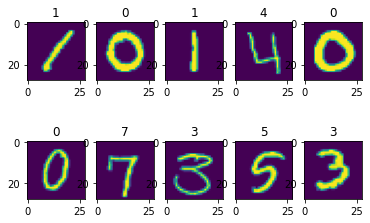

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i])

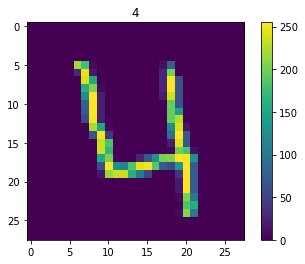

In [8]:
plt.title(y_train[3])
plt.imshow(X_train[3])
plt.colorbar()

Normalizando os dados das cores para facilitar para a rede neural no seu treinamento.

In [9]:
X_train = X_train/float(255)
X_test = X_test/float(255)

## Treinando a Rede Neural

Então será uma rede neural de multicamadas, conhecido como deep learning, com 6 nós, usando função ReLu como ativação nas camadas ocultas e Softmax na camada de saída, otimizador Adam e 100 épocas para treinar.

In [10]:
np.random.seed(123)

rede_neural = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

rede_neural.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = rede_neural.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16, shuffle=True, verbose=0)

Pelos gráficos os dados de validação e treino estão próximos, e a perda (loss), está baixa.

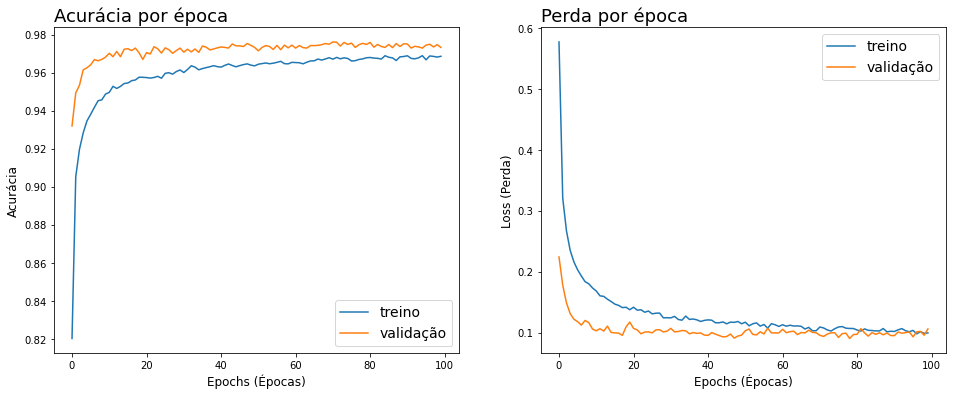

In [11]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época', fontsize=18, loc='left')
plt.xlabel('Epochs (Épocas)', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.legend(['treino', 'validação'], prop={'size': 14})

plt.subplot(1, 2, 2)

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época', fontsize=18, loc='left')
plt.xlabel('Epochs (Épocas)', fontsize=12)
plt.ylabel('Loss (Perda)', fontsize=12)
plt.legend(['treino', 'validação'], prop={'size': 14})

Validando o medelo se tem uma loss de 0.034 (quando mais próximo de zero melhor) e uma acurácia de 0.99.

In [12]:
rede_neural.evaluate(X_train, y_train)

42000/42000 [==============================] - 1s 25us/sample - loss: 0.0371 - accuracy: 0.9904


[0.03706244391577673, 0.99038094]

Aqui estou salvando a rede neural treinada, assim podendo usar em outros projetos ou fazer deploy para produção.

In [13]:
rede_neural.save('modelo_epochs100_nos6.h5')

Previssão usando os dados de teste e salvando os resultados para enviar ao Kaggle.

In [14]:
y_pred = rede_neural.predict(X_test)

submission = pd.DataFrame()
submission['ImageId'] = range(1, 28001)
submission['Label'] = np.argmax(y_pred, axis=1)
submission.to_csv('rede_neural_v1.csv', index=False)